In [1]:
#library(readr)
library(survival)
#library(tidyverse)
library(MASS)
library(flexsurv)
library(corrplot)
library(openxlsx)
#install.packages("flexsurv")
# install.packages("survival")
# remove.packages("survival")
library(psych)

Warning message:
“package ‘survival’ was built under R version 3.6.2”
corrplot 0.84 loaded



In [2]:
library(ggplot2)
library(GGally)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [3]:
install.packages("rworldmap")
library(rworldmap)


The downloaded binary packages are in
	/var/folders/jb/jxztdls55vncm84hp50zf9n40000gn/T//RtmpuYkX5Q/downloaded_packages


Loading required package: sp

### Welcome to rworldmap ###

For a short introduction type : 	 vignette('rworldmap')



In [4]:
# 警告メッセージ非表示
options(warn=-1)

In [5]:
df <- read.xlsx("../data/data_covid_fix_name.xlsx")
df <- na.omit(df)
head(df)

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,2866376,60.319,13364.155,6996524,7.84,8.005411,7.67,70,74.3,1,108641,303.14
2,Algeria,42228429,72.629,15481.788,9108277,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
3,Angola,30809762,65.514,6452.355,10490120,5.40,5.979936,4.83,83,17.9,1,303691,76.94
4,Argentina,44494502,91.870,20610.569,19025624,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
6,Australia,24992369,86.012,51663.365,7608913,8.62,9.160533,8.07,26,97.3,1,1347,75667.65
7,Austria,8847037,58.297,55454.689,7103537,8.48,9.245685,7.71,58,73.2,1,80272,12935.50


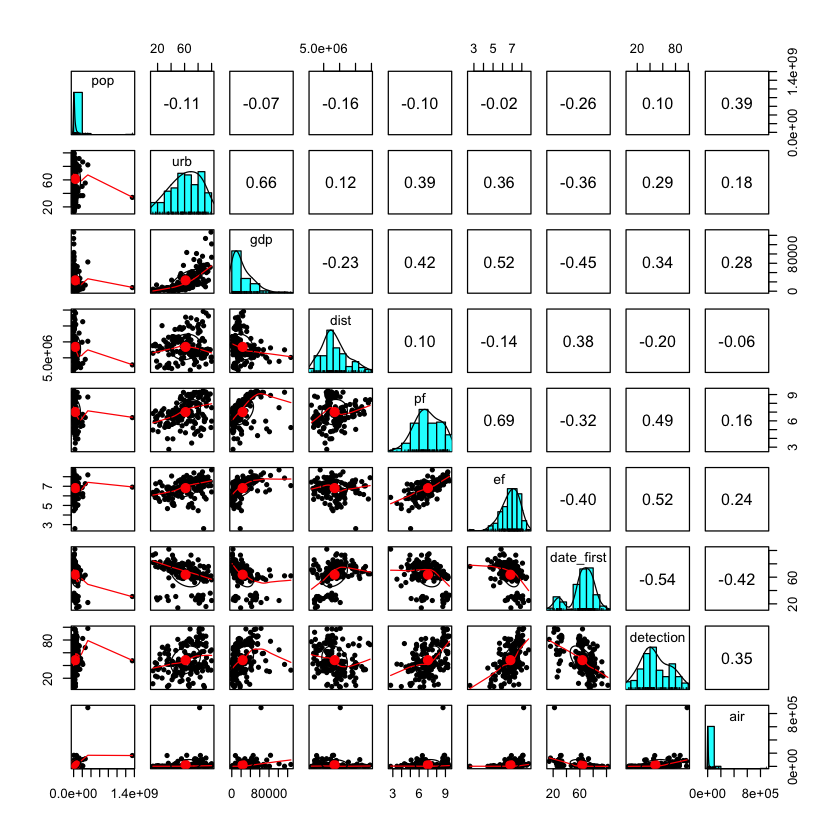

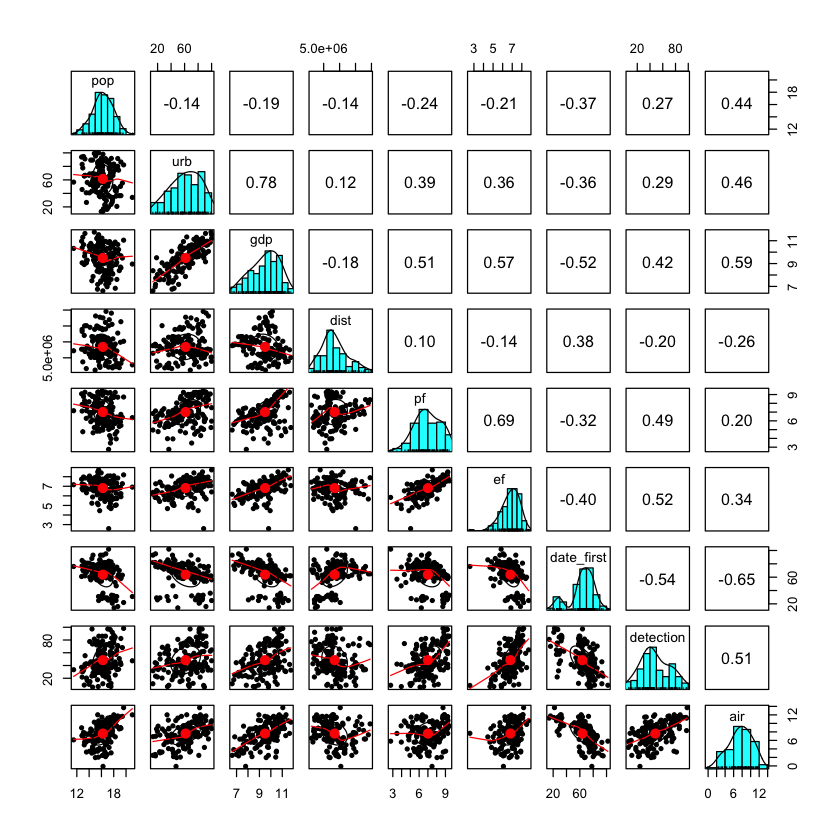

In [20]:
tmp = df[c(2,3,4,5,7,8,9,10,13)]
psych::pairs.panels(tmp)
tmp$pop = log(tmp$pop)
tmp$gdp = log(tmp$gdp)
tmp$air = log(tmp$air)
psych::pairs.panels(tmp)
#ggpairs(tmp)

# クラスタリング  

In [21]:
data = df[c(2,3,4,5,7,8,10,13)]

In [22]:
# 正規化
# data = log(data)
data$pop = log(data$pop)
data$gdp = log(data$gdp)
data$air = log(data$air)

In [23]:
# 標準化
data = scale(data)

In [24]:
head(data)

,pop,urb,gdp,dist,pf,ef,detection,air
1,-0.8304081,-0.05212763,0.00803967,-0.3576231,0.6966764,0.9256850,1.162692,-0.7001144
2,0.8179593,0.50802412,0.13185308,0.1687352,-1.2522310,-2.1984750,-1.635422,0.4308812
3,0.6247775,0.18426460,-0.60487411,0.5131620,-0.7111603,-2.1338373,-1.370432,-1.2074928
4,0.8499898,1.38356270,0.37271488,2.6406519,0.7239149,-1.2289081,1.189640,-0.1043414
6,0.4965495,1.11700145,1.14624886,-0.2049840,1.4995605,1.3566037,2.195703,1.3424378
7,-0.1398002,-0.14413631,1.20586029,-0.3309499,1.5587471,0.9687769,1.113287,0.6888197


In [25]:
# seed固定
set.seed(123)

# K-means
km <- kmeans(data,3)
result <- km$cluster

In [26]:
result

1   2   3   4   6   7   8   9  10  11  13  14  15  16  17  18  19  20  21  22 
  3   1   1   2   3   3   1   2   3   1   2   3   2   1   1   2   2   2   3   2 
 23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42 
  3   1   1   1   1   3   2   1   1   3   2   1   2   1   3   2   3   1   3   2 
 43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  62  63 
  2   1   2   3   1   2   3   3   2   2   3   3   1   3   2   1   1   2   2   3 
 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83 
  3   1   3   1   1   3   3   3   2   3   3   3   1   3   1   1   3   3   1   1 
 84  85  86  87  88  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 
  3   3   1   1   3   2   1   2   3   1   3   2   1   1   1   2   1   3   3   2 
105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 
  1   1   2   3   3   1   2   1   2   2   3   3   3   3   3   3   1   3   1   2 
125 126 127 128 129 130 131 132 133 134 135 136 137 138 140 141 142 143 144 145 
  2   1   3   2   3   3   3   3   1   1   2   3   3   3   1   2   1   3   1   1 
146 147 148 149 150 151 152 153 154 155 
  3   3   1   3   2   1   1   1   1   1

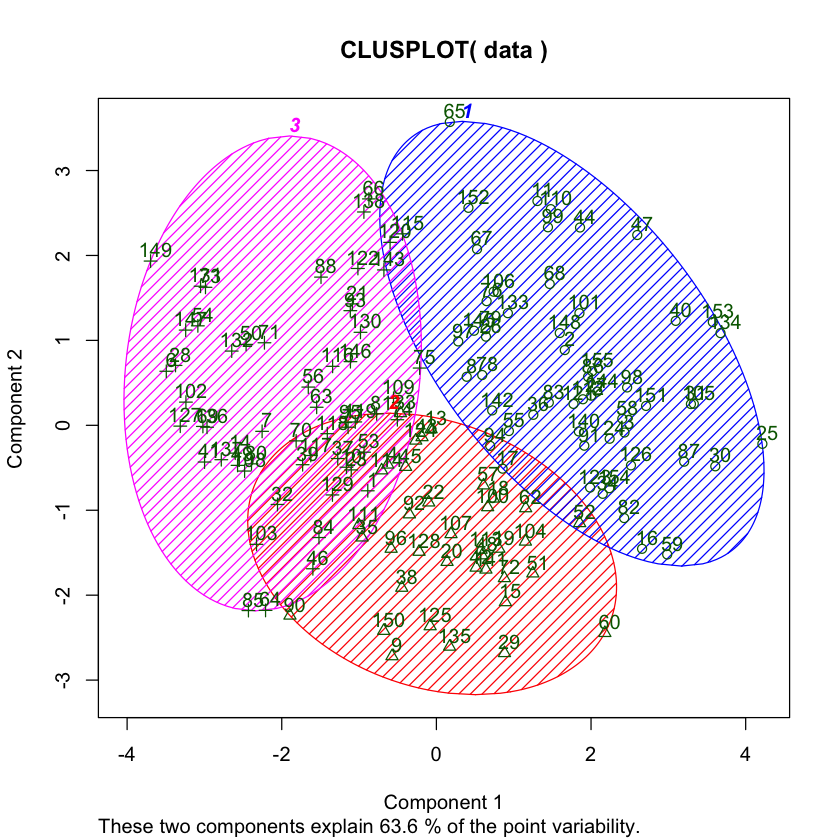

In [27]:
library(cluster)
clusplot(data, km$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)

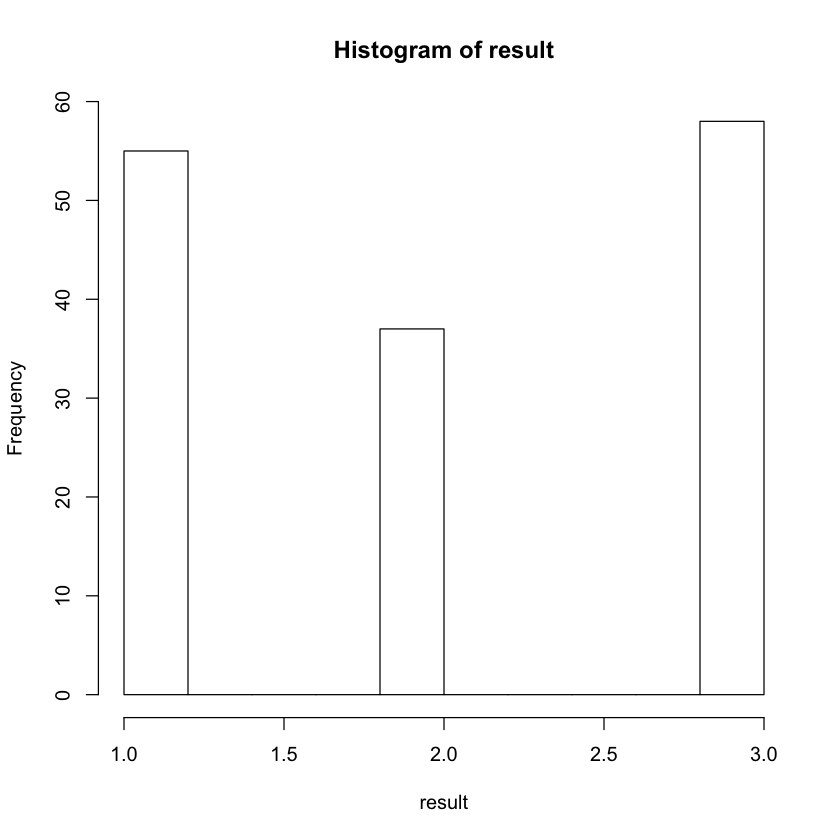

In [28]:
hist(result)

In [29]:
df$cluster <- as.factor(result)

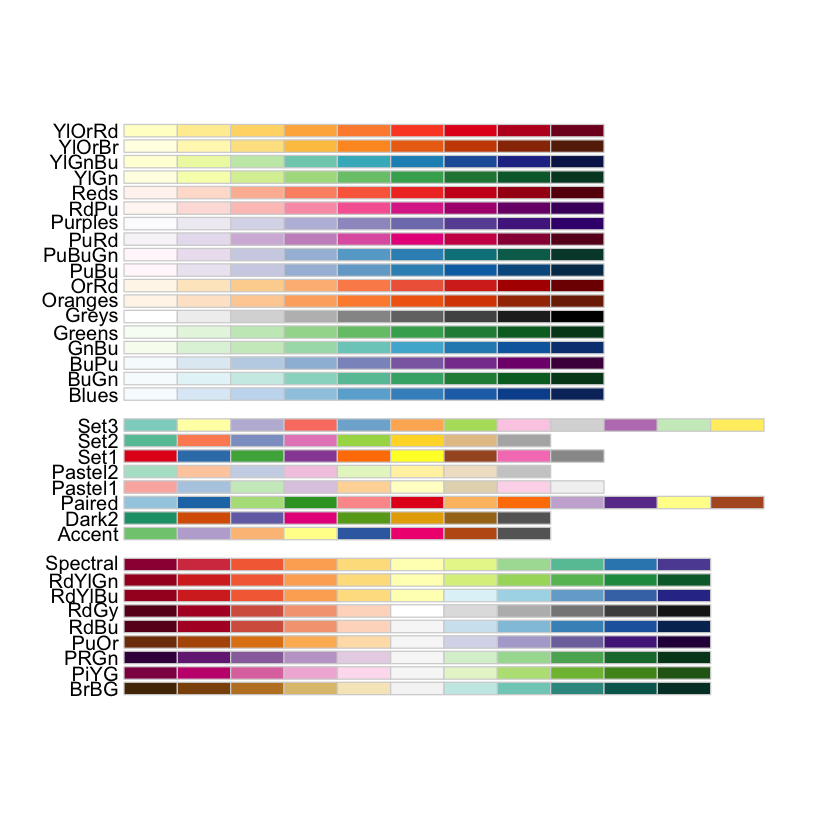

In [30]:
library(RColorBrewer)
display.brewer.all()

149 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
94 codes from the map weren't represented in your data


using catMethod='categorical' for non numeric data in mapCountryData



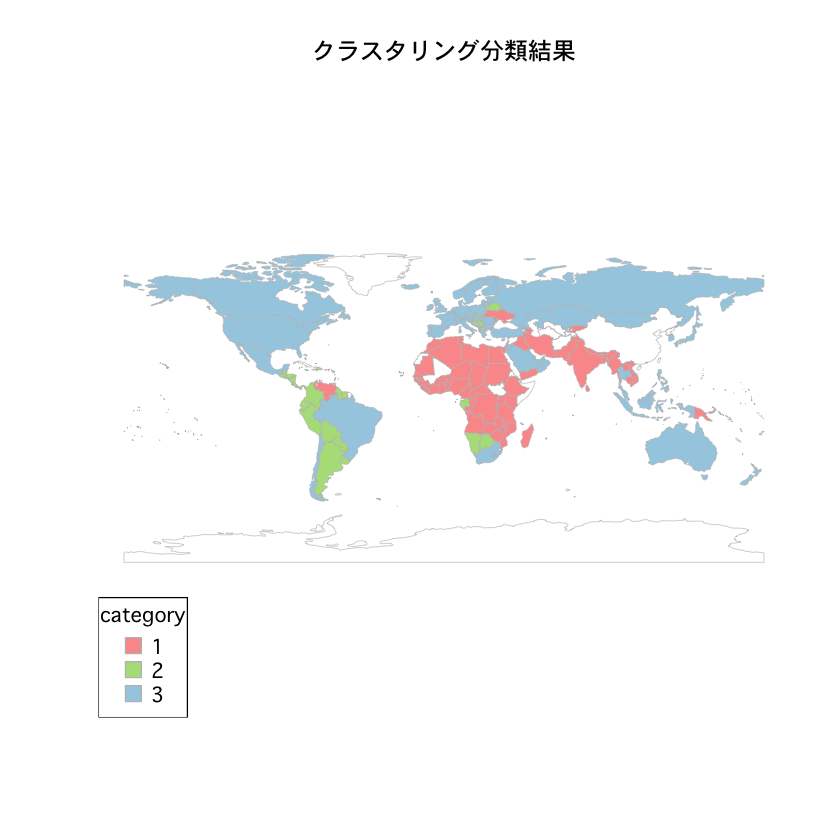

In [31]:
# 色の指定
cols <- brewer.pal(6, "Paired")

map_obj <- joinCountryData2Map(df, joinCode="NAME", nameJoinColumn="country")
#png("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/COVID-19/map/data_first.png", width=960, height=540)
par(family="Osaka")
mapCountryData(map_obj, nameColumnToPlot="cluster"
               , catMethod="fixedWidth"
               , mapTitle = "クラスタリング分類結果"
               #, colourPalette=heat.colors(7)
               #,colourPalette=c("#A6CEE3", "#B2DF8A", "#FB9A99") # 赤、緑、青
               ,colourPalette=cols[c(5,3,1)] # 赤、緑、青
               , addLegend = TRUE)

# クラスタごとの感染日数までの差の検定(一元配置分散分析)

In [32]:
# 帰無仮説：3群の母平均は等しい
# 対立仮説：3群の母平均は等しくない(指導法の違いによる学習結果に差がある)
# ※3群のうち1つでも母平均が異なる場合も対立仮説が支持
anova(lm(date_first ~ cluster, data=df))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
cluster,2,14805.00,7402.5016,31.40021,4.416281e-12
Residuals,147,34654.79,235.7469,NA,NA


In [33]:
# Tukey(テューキー)の多重比較
TukeyHSD(aov(date_first ~ cluster, data=df))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = date_first ~ cluster, data = df)

$cluster
          diff        lwr       upr     p adj
2-1   2.562654  -5.167002  10.29231 0.7128412
3-1 -19.269592 -26.111738 -12.42745 0.0000000
3-2 -21.832246 -29.481082 -14.18341 0.0000000


## クラスターごとの可視化

In [34]:
df1 = df[df$cluster==1,]
df2 = df[df$cluster==2,]
df3 = df[df$cluster==3,]

In [35]:
nrow(df1)
nrow(df2)
nrow(df3)

[1] 55

[1] 37

[1] 58

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



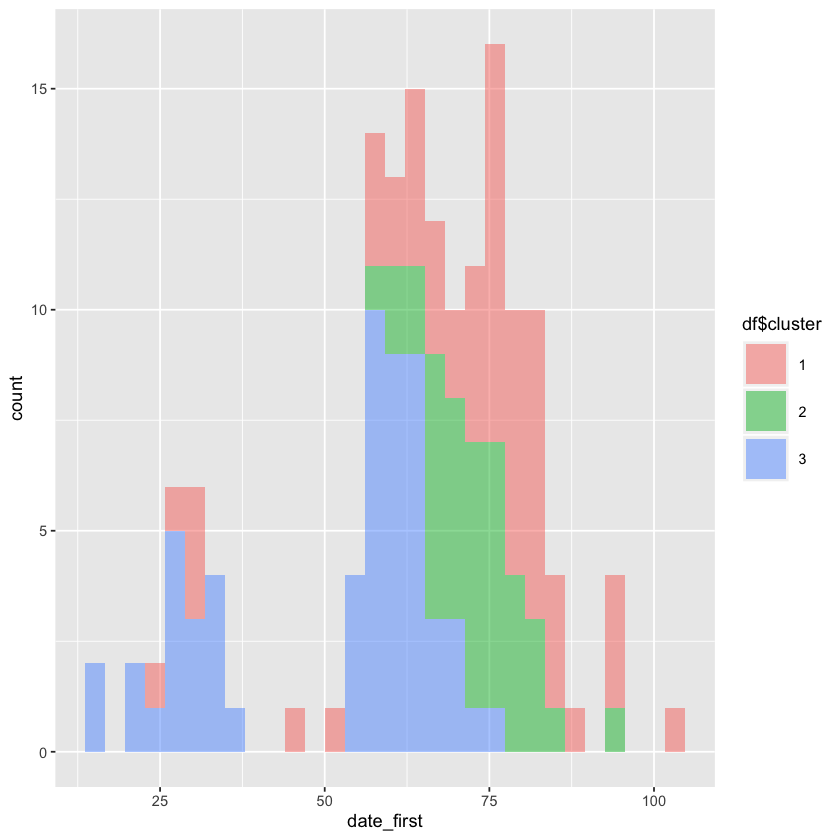

In [36]:
g4<-ggplot(df,aes(x=date_first)) #x軸はSepal.Length。ヒストグラムのy軸は度数なので、ここでは指定不要
g4<-g4+geom_histogram(aes(fill=df$cluster), #種類ごとに処理して塗り分け
                      #bins=30, #棒は３０本立てる
                      size=10, #横に表示するレジェンドのマーク?の大きさ
                      　alpha=0.5) #透過性
g4

In [37]:
overlap_hist <- function(df, x, factor) {
   g5 <- ggplot(df,  
            aes(x = x,　
                y = ..density..,  
                colour = factor,
                fill = factor 
                )
            )
    g5 <- g5 + geom_histogram(   # ヒストグラム
        position = "identity",
        alpha = 0.5
        )

    g5 <- g5 + geom_density(     # 密度曲線
        stat = "density",
        position = "identity",
        alpha = 0.5
        )


    #描画
    return(g5)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



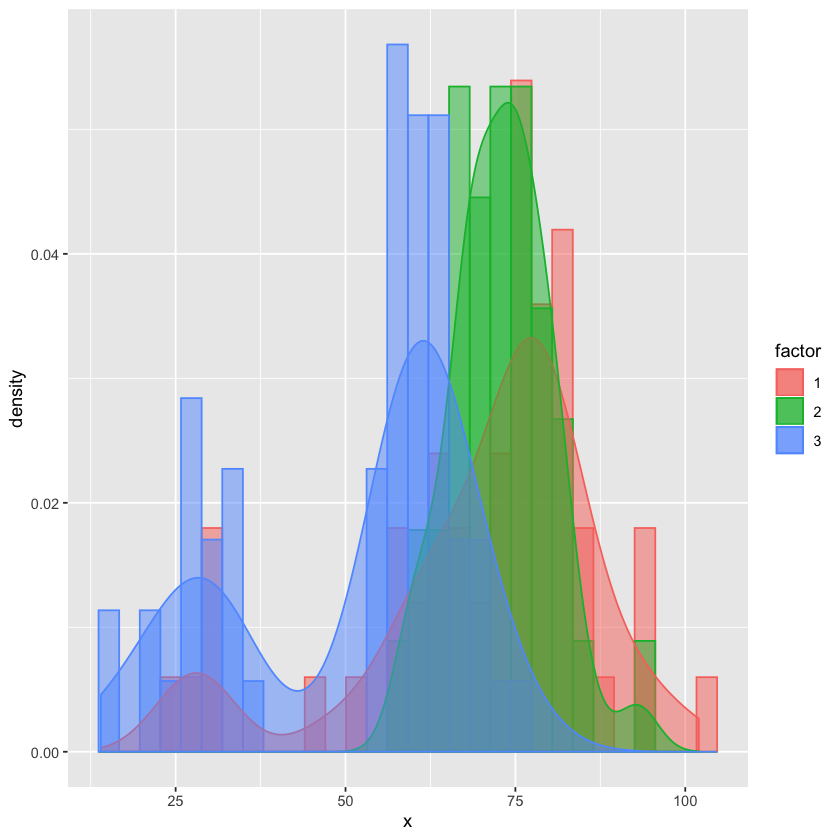

In [38]:
# date_first
overlap_hist(df, df$date_first, df$cluster)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



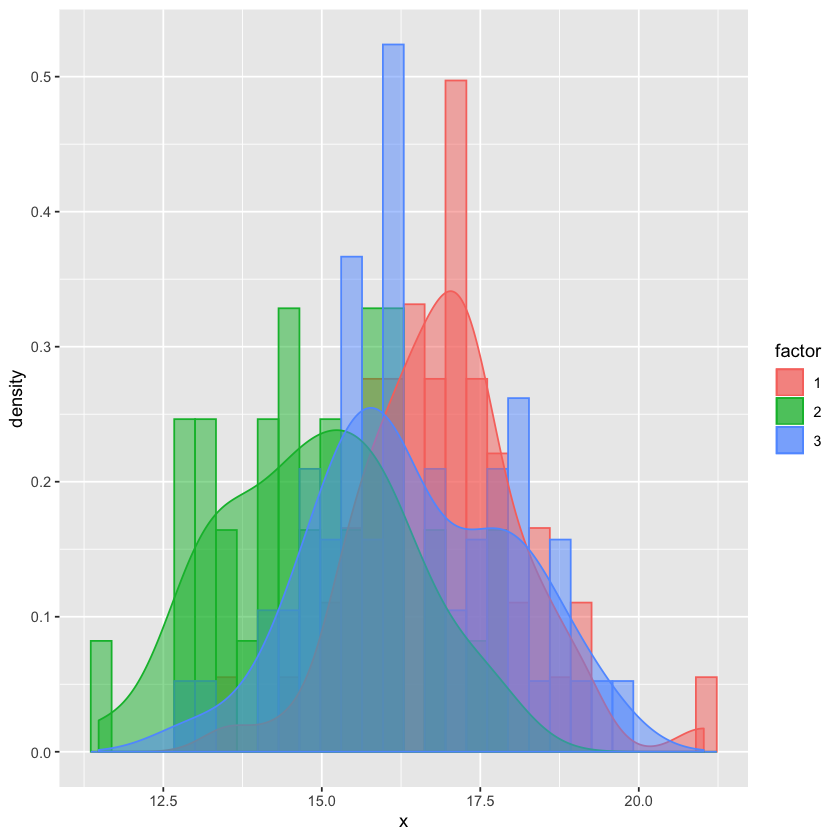

In [39]:
# pop
overlap_hist(df, log(df$pop), df$cluster)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



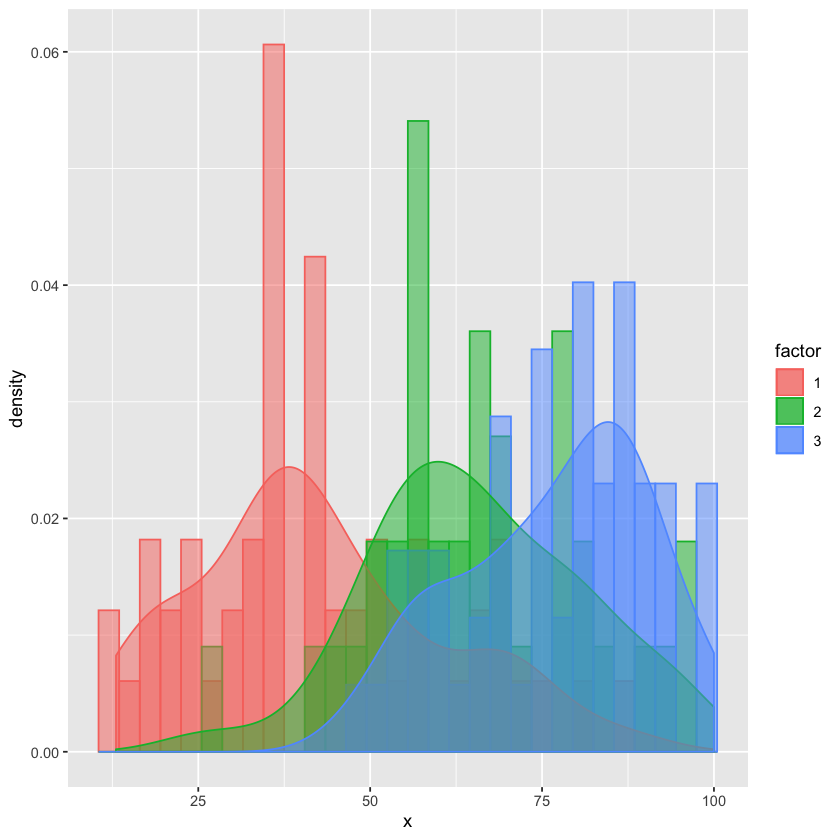

In [40]:
# urb
overlap_hist(df, df$urb, df$cluster)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



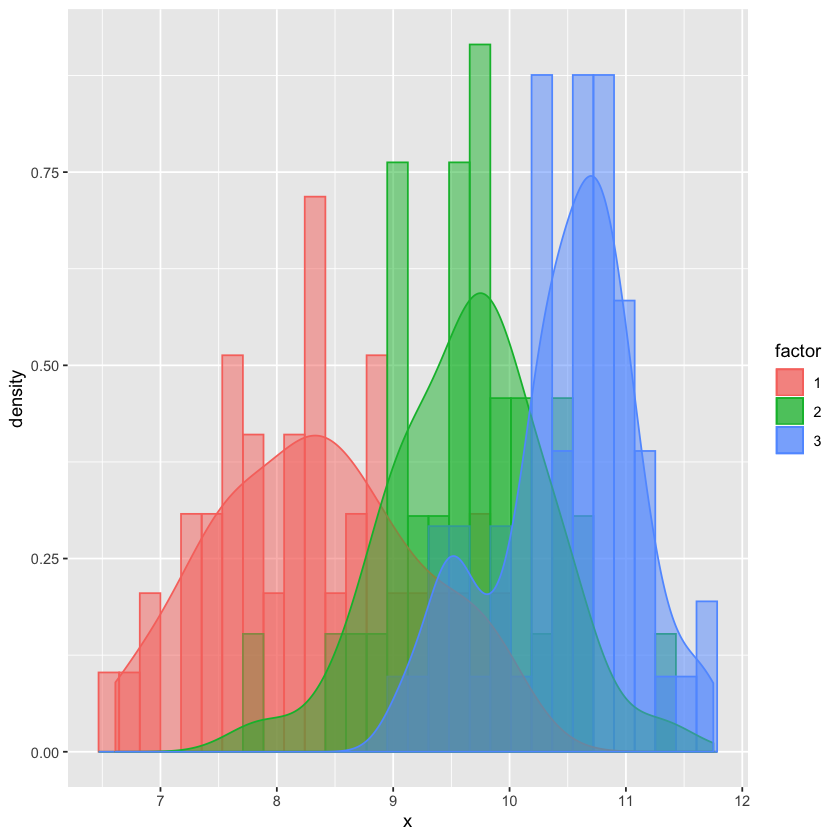

In [41]:
# gdp
overlap_hist(df, log(df$gdp), df$cluster)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



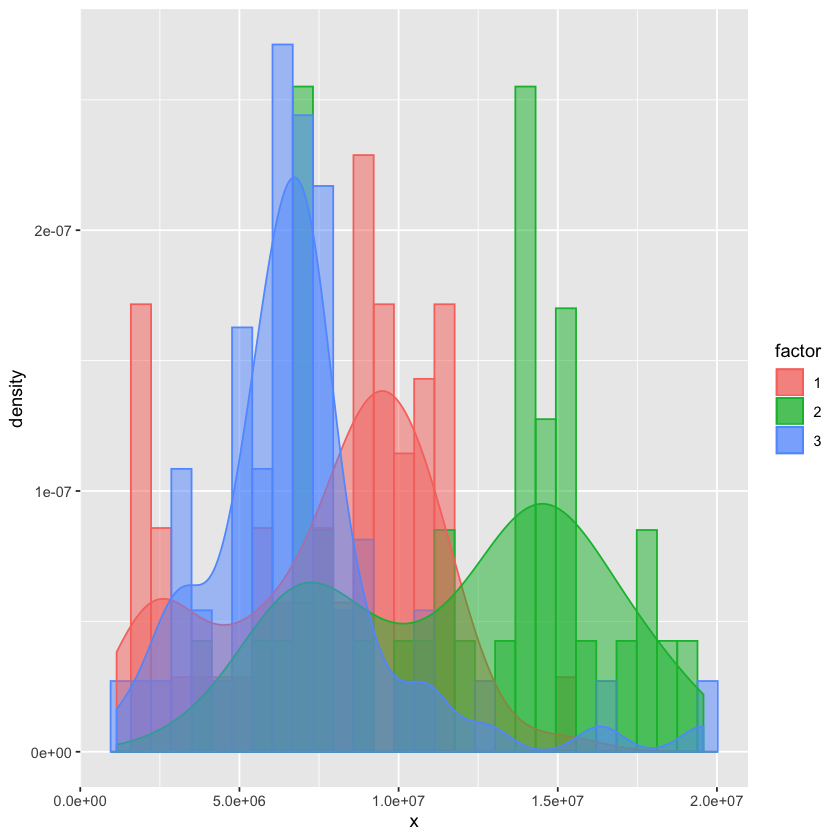

In [42]:
# dist
overlap_hist(df, df$dist, df$cluster)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



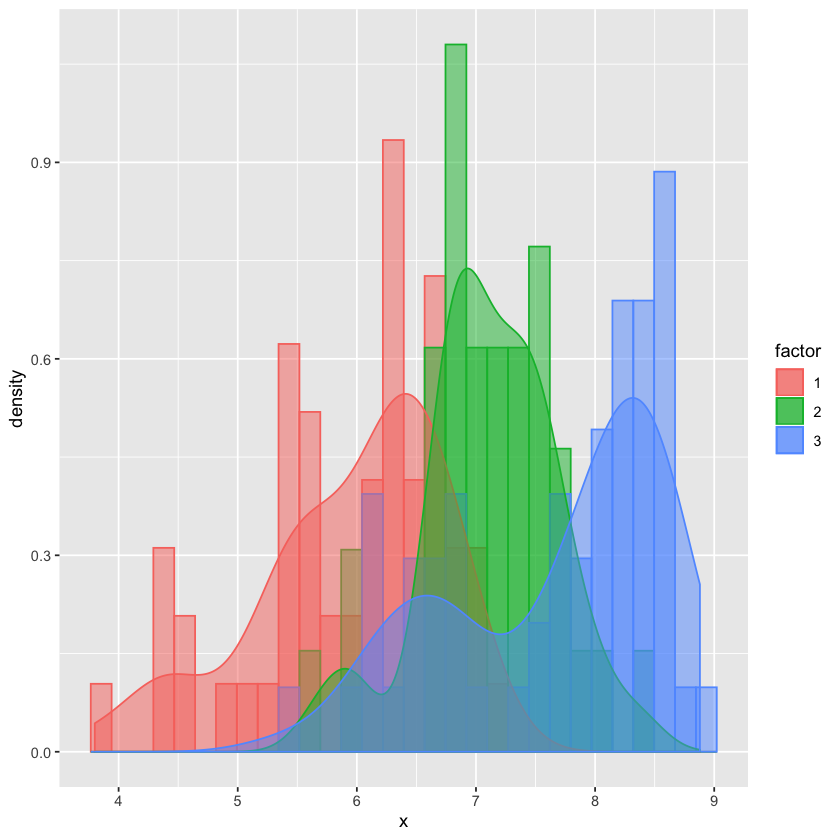

In [43]:
# hf
overlap_hist(df, df$hf, df$cluster)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



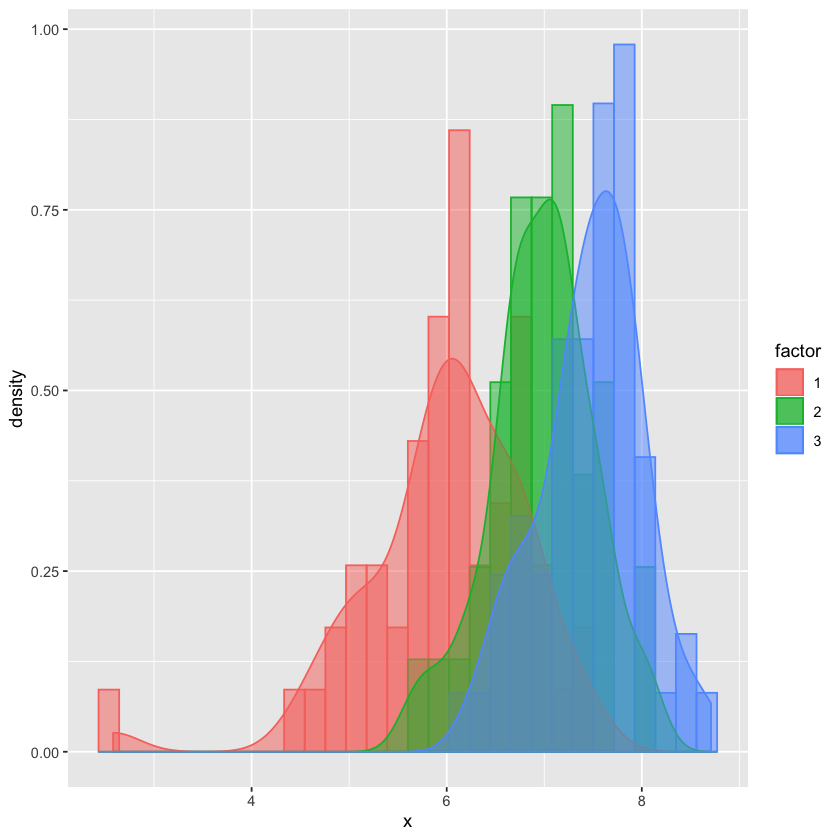

In [44]:
# ef
overlap_hist(df, df$ef, df$cluster)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



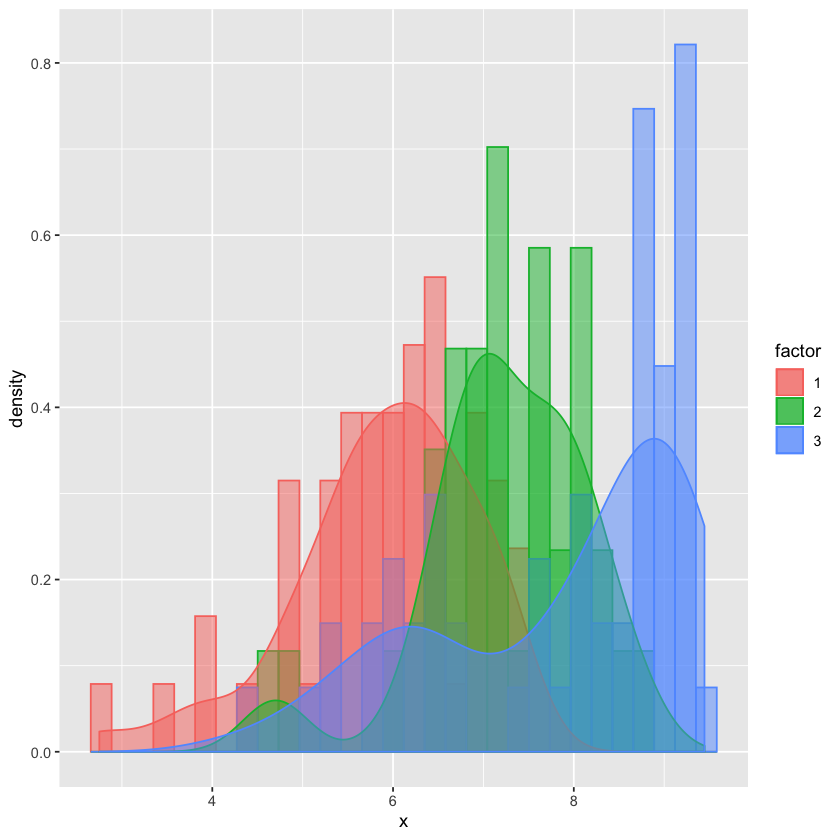

In [45]:
# pf
overlap_hist(df, df$pf, df$cluster)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



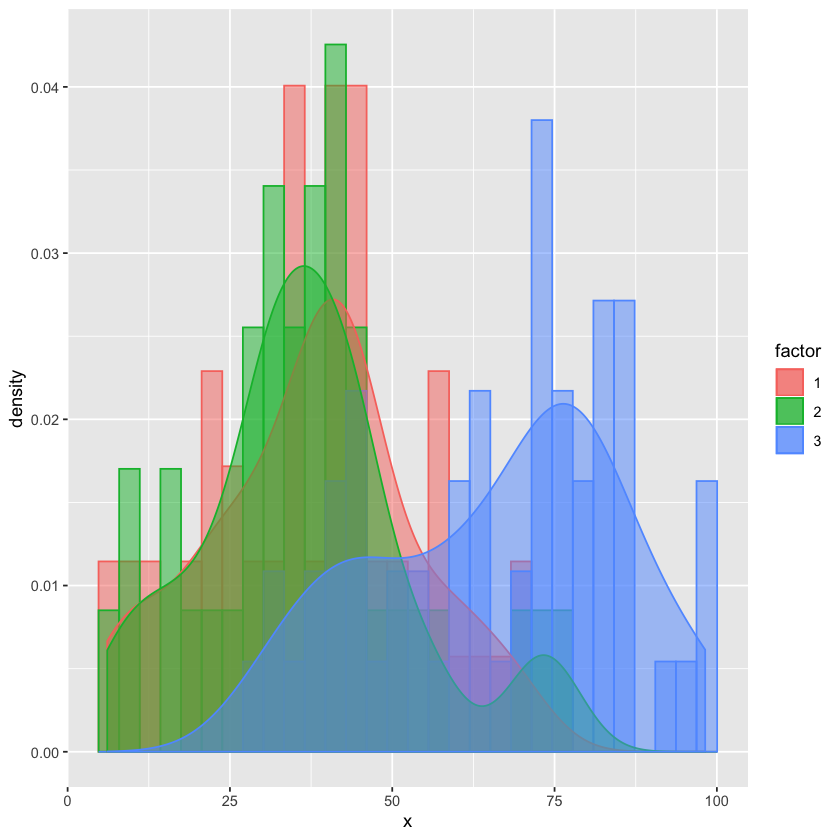

In [46]:
# detection
overlap_hist(df, df$detection, df$cluster)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



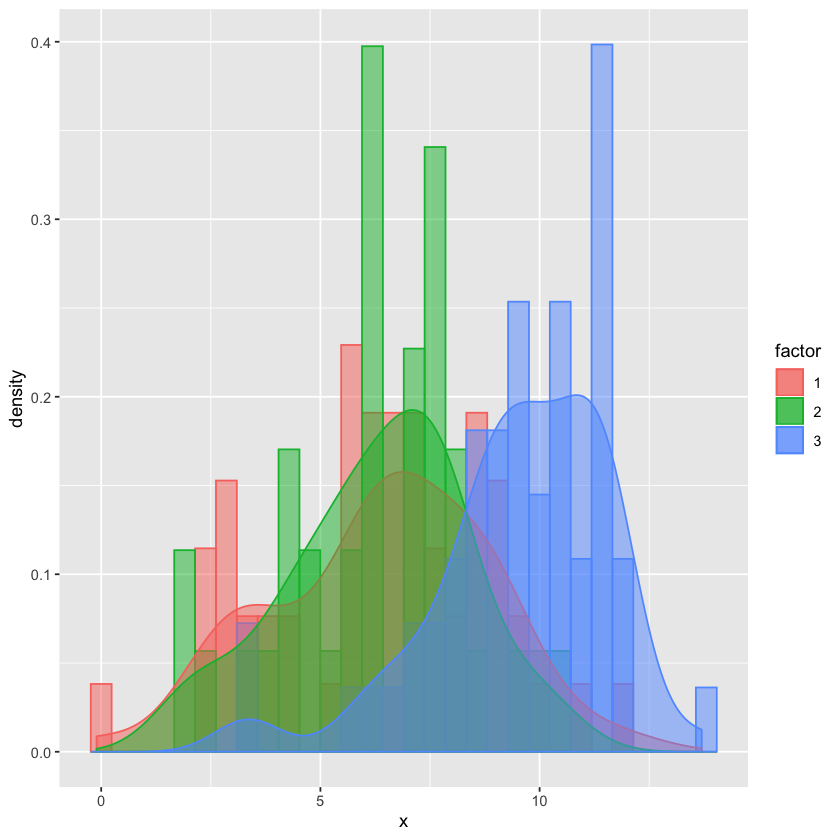

In [47]:
# air
overlap_hist(df, log(df$air), df$cluster)

In [48]:
head(df[c(2,3,4,5,7,8,9,10,13,14)])

,pop,urb,gdp,dist,pf,ef,date_first,detection,air,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,2866376,60.319,13364.155,6996524,8.005411,7.67,70,74.3,303.14,3
2,42228429,72.629,15481.788,9108277,5.201489,4.77,58,12.0,6442.44,1
3,30809762,65.514,6452.355,10490120,5.979936,4.83,83,17.9,76.94,1
4,44494502,91.870,20610.569,19025624,8.044600,5.67,65,74.9,1516.63,2
6,24992369,86.012,51663.365,7608913,9.160533,8.07,26,97.3,75667.65,3
7,8847037,58.297,55454.689,7103537,9.245685,7.71,58,73.2,12935.50,3


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



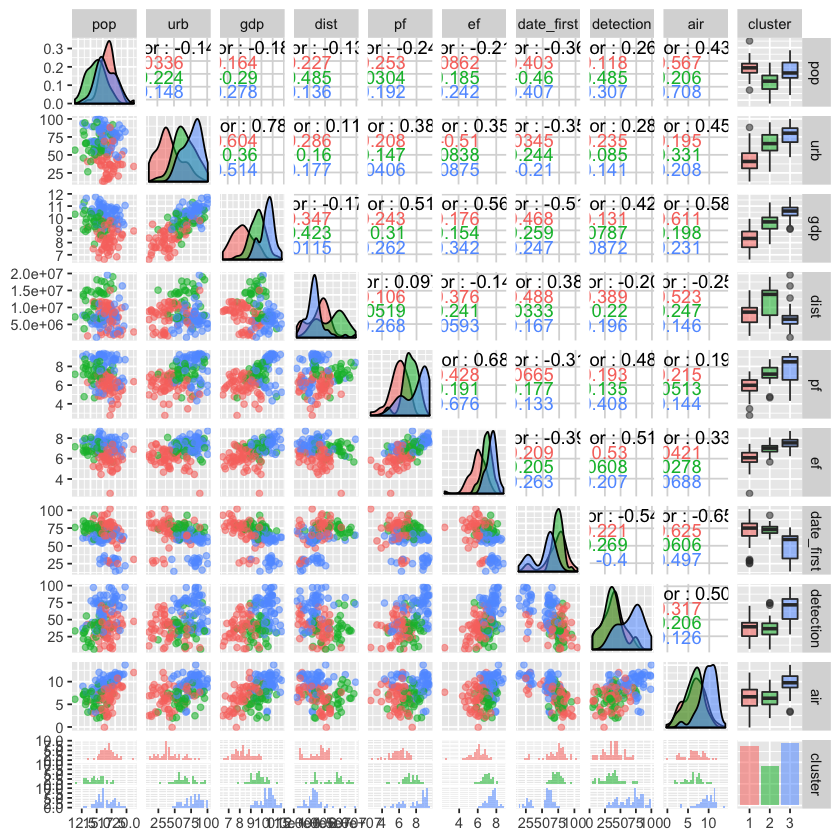

In [49]:
tmp = df[c(2,3,4,5,7,8,9,10,13,14)]
tmp$pop = log(tmp$pop)
tmp$gdp = log(tmp$gdp)
tmp$air = log(tmp$air)
ggpairs(tmp,aes_string(colour="cluster", alpha=0.5))

##### 可視化からの考察
- cluster1(赤)  
urb, gdp, pf, efが低め・・・途上国?  
distは真ん中くらいなのでアフリカ ~ アジアの途上国?  
- cluster2(緑)  
pop少ない, dist遠目・・・離島?  
- cluster3(青)  
urb進んでいる, gdp高い, distは近め, pf, efは高い・・・先進国?

149 codes from your data successfully matched countries in the map
1 codes from your data failed to match with a country code in the map
94 codes from the map weren't represented in your data


using catMethod='categorical' for non numeric data in mapCountryData



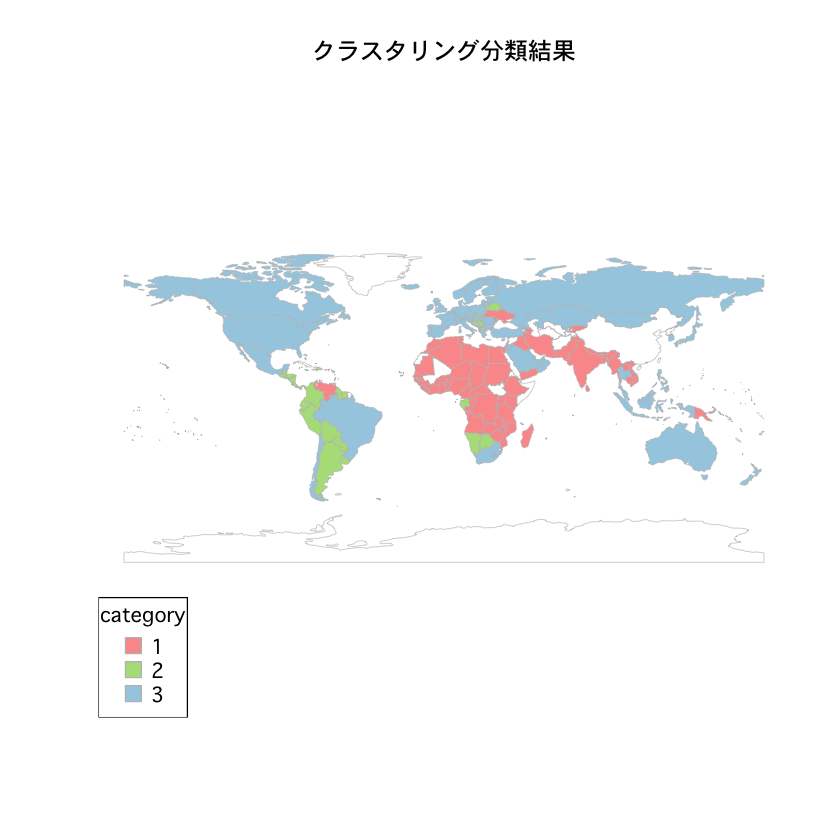

In [50]:
# 色の指定
cols <- brewer.pal(6, "Paired")

map_obj <- joinCountryData2Map(df, joinCode="NAME", nameJoinColumn="country")
#png("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/COVID-19/map/data_first.png", width=960, height=540)
par(family="Osaka")
mapCountryData(map_obj, nameColumnToPlot="cluster"
               , catMethod="fixedWidth"
               , mapTitle = "クラスタリング分類結果"
               #, colourPalette=heat.colors(7)
               #,colourPalette=c("#A6CEE3", "#B2DF8A", "#FB9A99") # 赤、緑、青
               ,colourPalette=cols[c(5,3,1)] # 赤、緑、青
               , addLegend = TRUE)

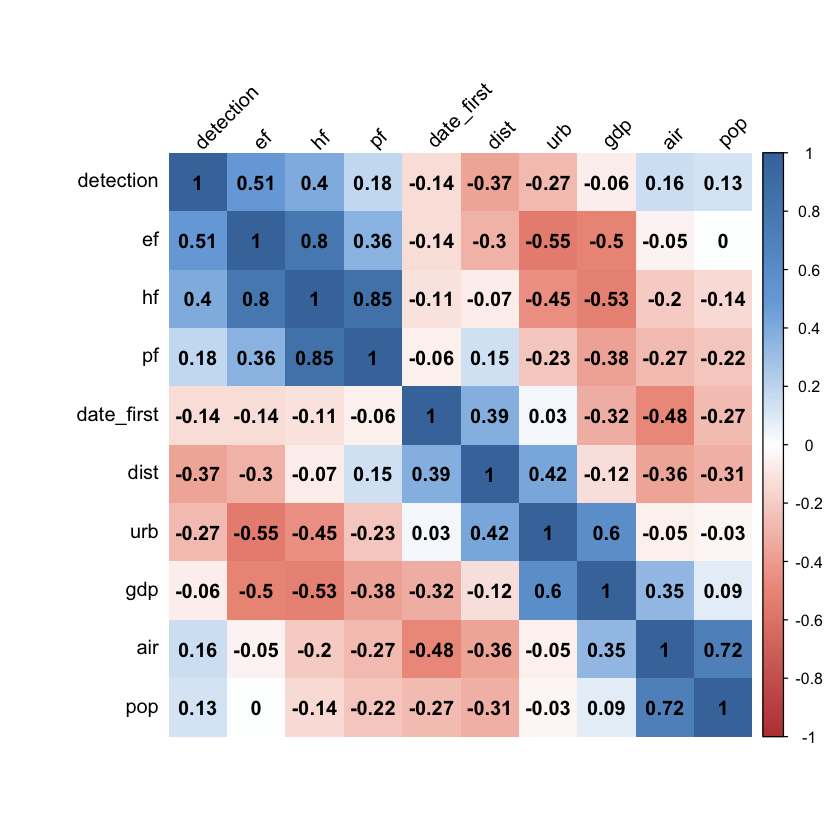

In [35]:
mcor <-cor(df1[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))

corrplot(mcor, method="shade", shade.col=NA, tl.col="black", tl.srt=45,
         col=col(200), addCoef.col="black", addcolorlabel="no", order="AOE")

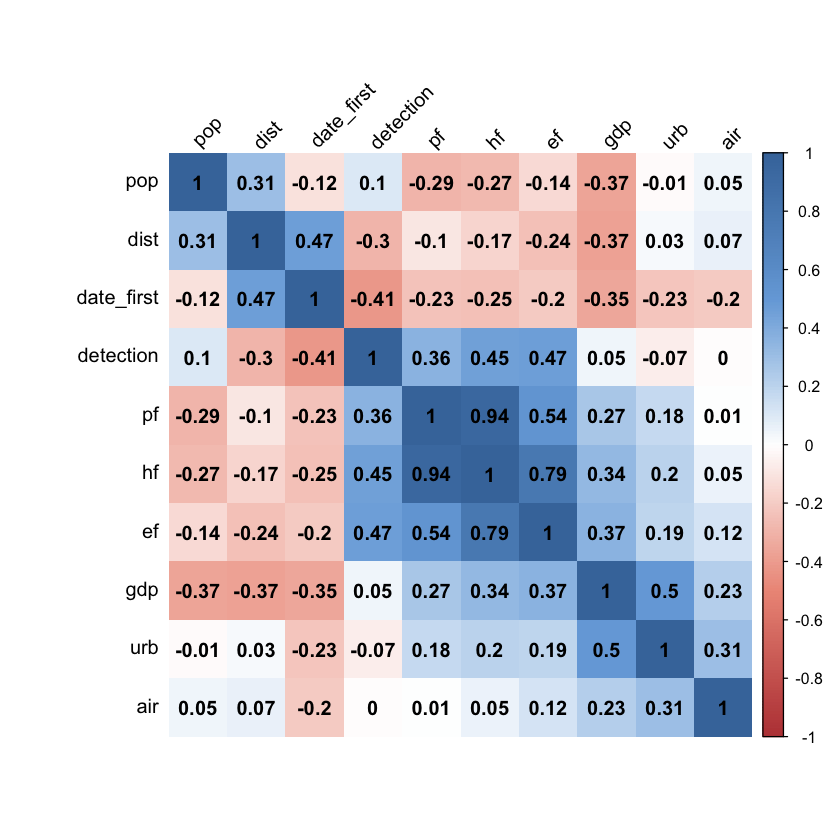

In [36]:
mcor <-cor(df2[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])

corrplot(mcor, method="shade", shade.col=NA, tl.col="black", tl.srt=45,
         col=col(200), addCoef.col="black", addcolorlabel="no", order="AOE")

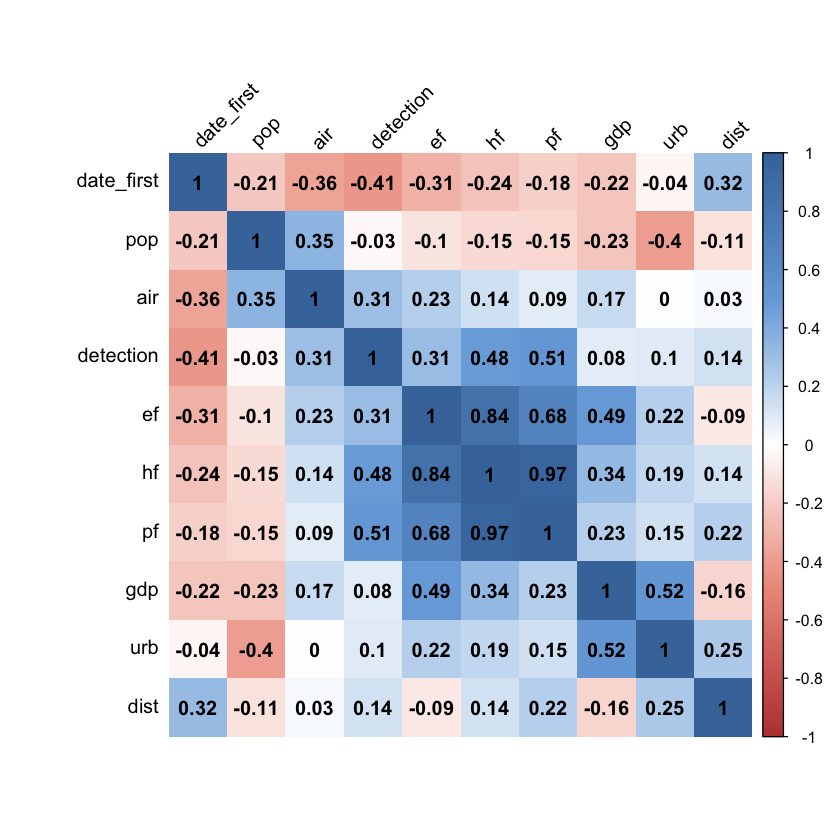

In [37]:
mcor <-cor(df3[c('date_first', 'pop', 'urb', 'gdp', 'dist', 'hf', 'pf', 'ef', 'detection', 'air')])

corrplot(mcor, method="shade", shade.col=NA, tl.col="black", tl.srt=45,
         col=col(200), addCoef.col="black", addcolorlabel="no", order="AOE")

# 生存時間解析 

In [38]:
#生存時間object
Y= Surv(df$date_first, df$status ==1)
Y1 = Surv(df1$date_first, df1$status ==1)
Y2 = Surv(df2$date_first, df2$status ==1)
Y3 = Surv(df3$date_first, df3$status ==1)

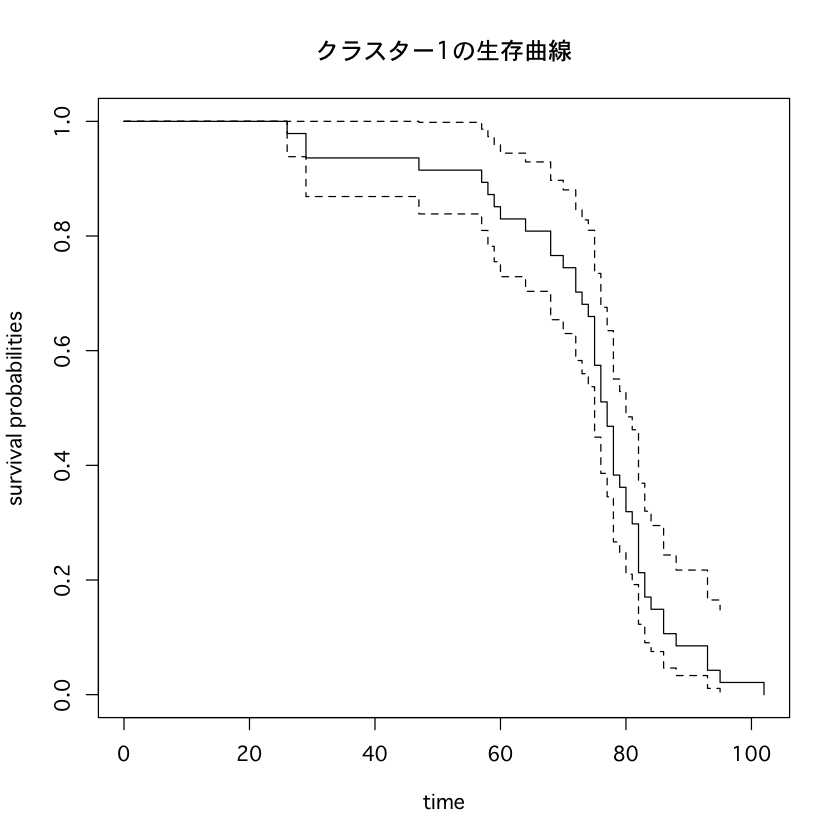

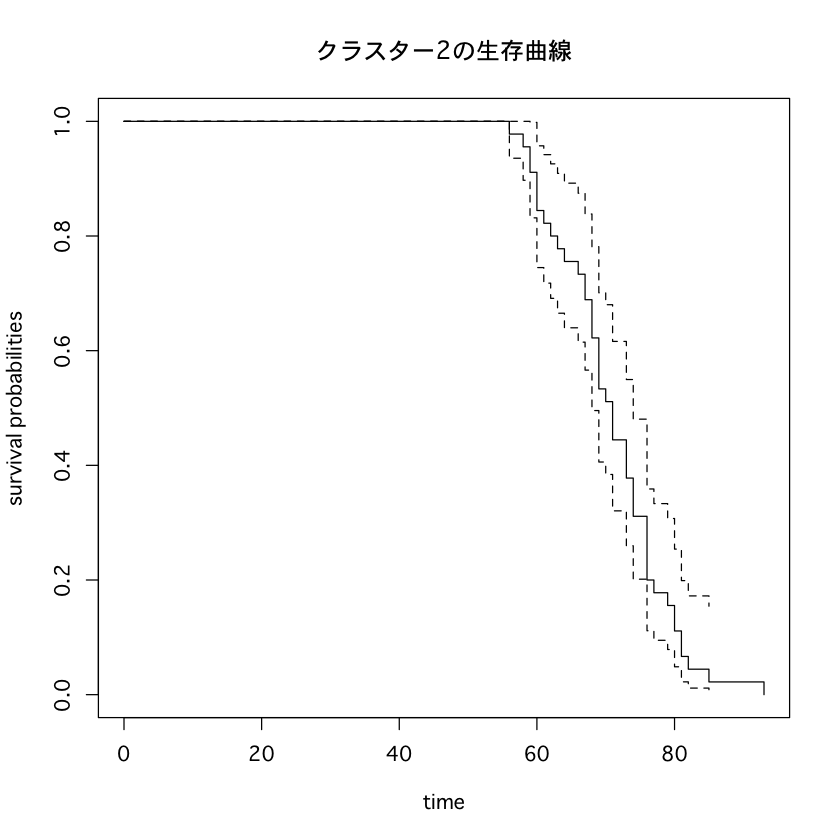

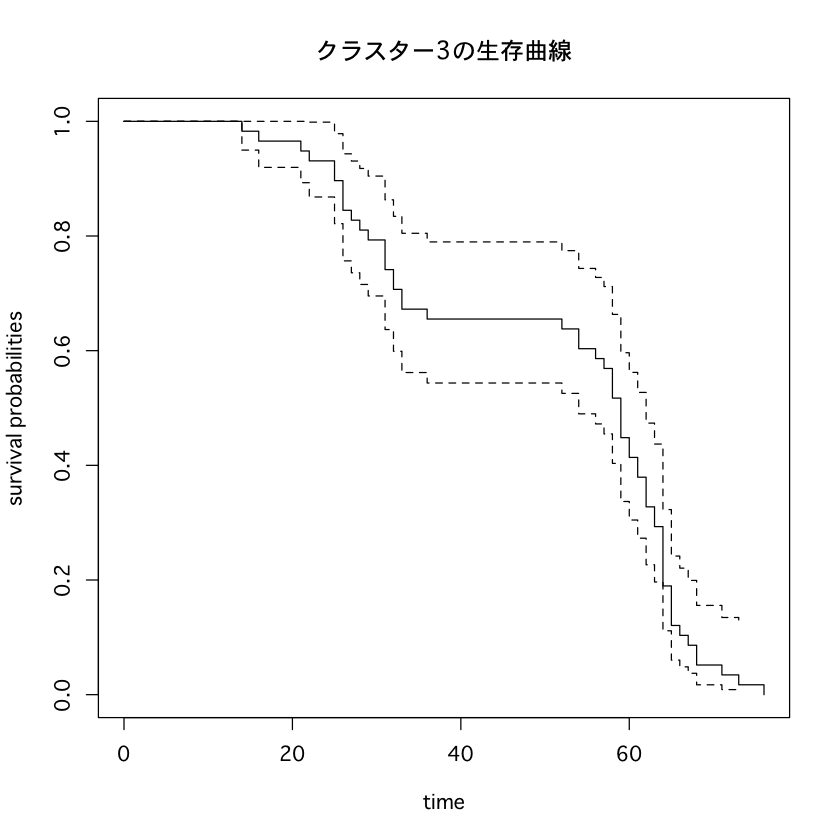

In [39]:
# KM
par(family="Osaka")
kmfit1 = survfit(Y1 ~ 1)
plot(kmfit1,  mark.t=TRUE, xlab="time", ylab = "survival probabilities", main="クラスター1の生存曲線")

kmfit2 = survfit(Y2 ~ 1)
plot(kmfit2,  mark.t=TRUE, xlab="time", ylab = "survival probabilities", main="クラスター2の生存曲線")

kmfit3 = survfit(Y3 ~ 1)
plot(kmfit3,  mark.t=TRUE, xlab="time", ylab = "survival probabilities", main="クラスター3の生存曲線")

### ワイブル分布を仮定した用いたモデル 

[1] "extreme" "logistic" "gaussian" "weibull" "exponential"
[6] "rayleigh" "loggaussian" "lognormal" "loglogistic" "t"

##### クラスター1

In [40]:
stepAIC(survreg(Y1 ~ log(hf)+log(pop)+log(gdp)+log(urb)+log(dist)+log(air)+log(detection),data = df1, dist="weibull"))

Start:  AIC=385.47
Y1 ~ log(hf) + log(pop) + log(gdp) + log(urb) + log(dist) + log(air) + 
    log(detection)

                 Df    AIC
- log(detection)  1 383.48
- log(urb)        1 383.74
- log(dist)       1 383.86
- log(gdp)        1 385.45
<none>              385.47
- log(air)        1 385.63
- log(pop)        1 386.31
- log(hf)         1 386.91

Step:  AIC=383.48
Y1 ~ log(hf) + log(pop) + log(gdp) + log(urb) + log(dist) + log(air)

            Df    AIC
- log(urb)   1 381.74
- log(dist)  1 381.95
- log(gdp)   1 383.45
<none>         383.48
- log(air)   1 383.74
- log(pop)   1 384.35
- log(hf)    1 387.58

Step:  AIC=381.74
Y1 ~ log(hf) + log(pop) + log(gdp) + log(dist) + log(air)

            Df    AIC
- log(dist)  1 380.64
<none>         381.74
- log(air)   1 381.92
- log(pop)   1 382.48
- log(gdp)   1 383.80
- log(hf)    1 385.59

Step:  AIC=380.64
Y1 ~ log(hf) + log(pop) + log(gdp) + log(air)

           Df    AIC
- log(air)  1 380.10
<none>        380.64
- log(pop)  1 381.48

Call:
survreg(formula = Y1 ~ log(hf) + log(pop) + log(gdp), data = df1, 
    dist = "weibull")

Coefficients:
(Intercept)     log(hf)    log(pop)    log(gdp) 
 6.53493855 -0.32874748 -0.05304067 -0.08649957 

Scale= 0.1343647 

Loglik(model)= -185   Loglik(intercept only)= -192.3
	Chisq= 14.59 on 3 degrees of freedom, p= 0.00221 
n= 47 

In [41]:
model1 = survreg(Y1 ~ log(hf) + log(pop) + log(gdp),data = df1, dist="weibull")
AIC(model1)
summary(model1)

[1] 380.0993


Call:
survreg(formula = Y1 ~ log(hf) + log(pop) + log(gdp), data = df1, 
    dist = "weibull")
              Value Std. Error      z      p
(Intercept)  6.5349     0.5526  11.83 <2e-16
log(hf)     -0.3287     0.1404  -2.34 0.0192
log(pop)    -0.0530     0.0208  -2.55 0.0107
log(gdp)    -0.0865     0.0278  -3.11 0.0019
Log(scale)  -2.0072     0.1227 -16.36 <2e-16

Scale= 0.134 

Weibull distribution
Loglik(model)= -185   Loglik(intercept only)= -192.3
	Chisq= 14.59 on 3 degrees of freedom, p= 0.0022 
Number of Newton-Raphson Iterations: 7 
n= 47 


##### クラスター2

In [42]:
stepAIC(survreg(Y2 ~ log(hf)+log(pop)+log(gdp)+log(urb)+log(dist)+log(air)+log(detection),data = df2, dist="weibull"))

Start:  AIC=316.66
Y2 ~ log(hf) + log(pop) + log(gdp) + log(urb) + log(dist) + log(air) + 
    log(detection)

                 Df    AIC
- log(urb)        1 314.81
- log(air)        1 314.81
- log(detection)  1 315.07
- log(hf)         1 315.56
- log(gdp)        1 316.56
<none>              316.66
- log(pop)        1 320.82
- log(dist)       1 321.20

Step:  AIC=314.81
Y2 ~ log(hf) + log(pop) + log(gdp) + log(dist) + log(air) + log(detection)

                 Df    AIC
- log(air)        1 312.97
- log(detection)  1 313.16
- log(hf)         1 313.64
<none>              314.81
- log(gdp)        1 315.91
- log(dist)       1 319.36
- log(pop)        1 319.58

Step:  AIC=312.97
Y2 ~ log(hf) + log(pop) + log(gdp) + log(dist) + log(detection)

                 Df    AIC
- log(detection)  1 311.45
- log(hf)         1 311.68
<none>              312.97
- log(gdp)        1 314.31
- log(dist)       1 317.42
- log(pop)        1 317.62

Step:  AIC=311.45
Y2 ~ log(hf) + log(pop) + log(gdp) + log(di

Call:
survreg(formula = Y2 ~ log(pop) + log(gdp) + log(dist), data = df2, 
    dist = "weibull")

Coefficients:
(Intercept)    log(pop)    log(gdp)   log(dist) 
 3.85599276 -0.04728581 -0.05931920  0.10688751 

Scale= 0.09445371 

Loglik(model)= -150.3   Loglik(intercept only)= -160
	Chisq= 19.26 on 3 degrees of freedom, p= 0.000241 
n= 45 

In [43]:
model2 = survreg(Y2 ~ log(pop) + log(gdp) + log(dist),data = df2, dist="weibull")
AIC(model2)
summary(model2)

[1] 310.6858


Call:
survreg(formula = Y2 ~ log(pop) + log(gdp) + log(dist), data = df2, 
    dist = "weibull")
              Value Std. Error      z       p
(Intercept)  3.8560     0.7161   5.38 7.3e-08
log(pop)    -0.0473     0.0158  -3.00  0.0027
log(gdp)    -0.0593     0.0269  -2.21  0.0274
log(dist)    0.1069     0.0351   3.04  0.0023
Log(scale)  -2.3596     0.0981 -24.06 < 2e-16

Scale= 0.0945 

Weibull distribution
Loglik(model)= -150.3   Loglik(intercept only)= -160
	Chisq= 19.26 on 3 degrees of freedom, p= 0.00024 
Number of Newton-Raphson Iterations: 5 
n= 45 


##### クラスター3

In [44]:
stepAIC(survreg(Y3 ~ log(hf)+log(pop)+log(gdp)+log(urb)+log(dist)+log(air)+log(detection),data = df3, dist="weibull"))

Start:  AIC=487
Y3 ~ log(hf) + log(pop) + log(gdp) + log(urb) + log(dist) + log(air) + 
    log(detection)

                 Df    AIC
- log(gdp)        1 485.58
- log(air)        1 485.88
- log(urb)        1 486.59
<none>              487.00
- log(pop)        1 488.13
- log(detection)  1 488.67
- log(hf)         1 489.36
- log(dist)       1 493.14

Step:  AIC=485.58
Y3 ~ log(hf) + log(pop) + log(urb) + log(dist) + log(air) + log(detection)

                 Df    AIC
<none>              485.58
- log(urb)        1 486.29
- log(pop)        1 486.49
- log(detection)  1 486.95
- log(air)        1 487.53
- log(hf)         1 488.48
- log(dist)       1 493.09


Call:
survreg(formula = Y3 ~ log(hf) + log(pop) + log(urb) + log(dist) + 
    log(air) + log(detection), data = df3, dist = "weibull")

Coefficients:
   (Intercept)        log(hf)       log(pop)       log(urb)      log(dist) 
    6.60578820    -0.78053763    -0.06765980    -0.37051656     0.20496467 
      log(air) log(detection) 
   -0.06583008    -0.21055614 

Scale= 0.2576478 

Loglik(model)= -234.8   Loglik(intercept only)= -247.1
	Chisq= 24.56 on 6 degrees of freedom, p= 0.000412 
n= 58 

In [45]:
model3 = survreg(Y3 ~ log(hf) + log(pop) + log(urb) + log(dist) + log(air) + log(detection),data = df3, dist="weibull")
AIC(model3)
summary(model3)

[1] 485.5814


Call:
survreg(formula = Y3 ~ log(hf) + log(pop) + log(urb) + log(dist) + 
    log(air) + log(detection), data = df3, dist = "weibull")
                 Value Std. Error      z       p
(Intercept)     6.6058     1.5169   4.35 1.3e-05
log(hf)        -0.7805     0.3622  -2.15  0.0312
log(pop)       -0.0677     0.0410  -1.65  0.0987
log(urb)       -0.3705     0.2265  -1.64  0.1019
log(dist)       0.2050     0.0654   3.14  0.0017
log(air)       -0.0658     0.0328  -2.00  0.0450
log(detection) -0.2106     0.1164  -1.81  0.0706
Log(scale)     -1.3562     0.1060 -12.80 < 2e-16

Scale= 0.258 

Weibull distribution
Loglik(model)= -234.8   Loglik(intercept only)= -247.1
	Chisq= 24.56 on 6 degrees of freedom, p= 0.00041 
Number of Newton-Raphson Iterations: 6 
n= 58 


##### 階層化

In [46]:
model_strata = survreg(Y ~ log(hf)+log(pop)+log(gdp)+log(urb)+log(dist)+log(air)+log(detection)+strata(cluster),data = df, dist="weibull")
AIC(model_strata)

[1] 1181.661

In [47]:
summary(model_strata)


Call:
survreg(formula = Y ~ log(hf) + log(pop) + log(gdp) + log(urb) + 
    log(dist) + log(air) + log(detection) + strata(cluster), 
    data = df, dist = "weibull")
                  Value Std. Error      z       p
(Intercept)     5.64620    0.53263  10.60 < 2e-16
log(hf)        -0.32219    0.11869  -2.71  0.0066
log(pop)       -0.05469    0.01102  -4.96 6.9e-07
log(gdp)       -0.06408    0.02337  -2.74  0.0061
log(urb)       -0.03689    0.04754  -0.78  0.4378
log(dist)       0.06076    0.02856   2.13  0.0334
log(air)       -0.01058    0.00713  -1.48  0.1376
log(detection) -0.01243    0.02682  -0.46  0.6430
1              -1.91860    0.13325 -14.40 < 2e-16
2              -2.32796    0.10375 -22.44 < 2e-16
3              -1.35360    0.11220 -12.06 < 2e-16

Scale:
     1      2      3 
0.1468 0.0975 0.2583 

Weibull distribution
Loglik(model)= -579.8   Loglik(intercept only)= -619.7
	Chisq= 79.69 on 7 degrees of freedom, p= 1.6e-14 
Number of Newton-Raphson Iterations: 7 
n= 150 


### Gompertzを仮定した用いたモデル

In [48]:
fs_cluster1 <- flexsurvreg(Y1 ~ log(hf)+log(pop)+log(gdp)+log(urb)+log(dist)+log(air)+log(detection),
                   data = df1,dist = "Gompertz")
fs_cluster1

Call:
flexsurvreg(formula = Y1 ~ log(hf) + log(pop) + log(gdp) + log(urb) + 
    log(dist) + log(air) + log(detection), data = df1, dist = "Gompertz")

Estimates: 
                data mean  est        L95%       U95%       se       
shape                  NA   1.15e-01   8.82e-02   1.42e-01   1.38e-02
rate                   NA   9.46e-16   1.28e-22   6.98e-09   7.63e-15
log(hf)          1.76e+00   3.57e+00   4.75e-01   6.65e+00   1.58e+00
log(pop)         1.68e+01   3.33e-01  -2.85e-02   6.94e-01   1.84e-01
log(gdp)         8.15e+00   5.18e-01  -9.73e-02   1.13e+00   3.14e-01
log(urb)         3.60e+00   3.02e-01  -6.17e-01   1.22e+00   4.69e-01
log(dist)        1.58e+01   3.16e-01  -3.72e-01   1.01e+00   3.51e-01
log(air)         5.87e+00   1.77e-01  -3.70e-02   3.91e-01   1.09e-01
log(detection)   3.45e+00   2.29e-02  -6.84e-01   7.30e-01   3.61e-01
                exp(est)   L95%       U95%     
shape                  NA         NA         NA
rate                   NA         NA    

In [49]:
fs_cluster2 <- flexsurvreg(Y2 ~ log(hf)+log(pop)+log(gdp)+log(urb)+log(dist)+log(air)+log(detection),
                   data = df2,dist = "Gompertz")
fs_cluster2

Call:
flexsurvreg(formula = Y2 ~ log(hf) + log(pop) + log(gdp) + log(urb) + 
    log(dist) + log(air) + log(detection), data = df2, dist = "Gompertz")

Estimates: 
                data mean  est        L95%       U95%       se       
shape                  NA   1.40e-01   1.13e-01   1.66e-01   1.36e-02
rate                   NA   5.14e-05   9.79e-12   2.70e+02   4.06e-04
log(hf)          1.98e+00   1.94e+00  -2.54e+00   6.42e+00   2.29e+00
log(pop)         1.46e+01   4.28e-01   5.38e-02   8.02e-01   1.91e-01
log(gdp)         9.82e+00   4.61e-01  -2.39e-01   1.16e+00   3.57e-01
log(urb)         4.14e+00   1.78e-01  -1.42e+00   1.78e+00   8.17e-01
log(dist)        1.60e+01  -1.18e+00  -2.08e+00  -2.83e-01   4.59e-01
log(air)         6.22e+00   5.32e-02  -1.60e-01   2.66e-01   1.09e-01
log(detection)   3.58e+00   2.35e-01  -5.08e-01   9.79e-01   3.79e-01
                exp(est)   L95%       U95%     
shape                  NA         NA         NA
rate                   NA         NA    

In [50]:
fs_cluster3 <- flexsurvreg(Y3 ~ log(hf)+log(pop)+log(gdp)+log(urb)+log(dist)+log(air)+log(detection),
                   data = df3,dist = "Gompertz")
fs_cluster3

Call:
flexsurvreg(formula = Y3 ~ log(hf) + log(pop) + log(gdp) + log(urb) + 
    log(dist) + log(air) + log(detection), data = df3, dist = "Gompertz")

Estimates: 
                data mean  est        L95%       U95%       se       
shape                  NA   8.72e-02   6.76e-02   1.07e-01   9.98e-03
rate                   NA   1.78e-10   1.38e-16   2.29e-04   1.28e-09
log(hf)          2.00e+00   2.80e+00   5.35e-03   5.59e+00   1.42e+00
log(pop)         1.70e+01   3.69e-01  -3.34e-02   7.72e-01   2.06e-01
log(gdp)         1.03e+01   3.51e-01  -3.80e-01   1.08e+00   3.73e-01
log(urb)         4.31e+00   1.19e+00  -6.91e-01   3.07e+00   9.60e-01
log(dist)        1.57e+01  -6.93e-01  -1.18e+00  -2.02e-01   2.50e-01
log(air)         1.01e+01   1.48e-01  -1.87e-01   4.82e-01   1.71e-01
log(detection)   4.11e+00   9.43e-01   5.00e-02   1.84e+00   4.55e-01
                exp(est)   L95%       U95%     
shape                  NA         NA         NA
rate                   NA         NA    